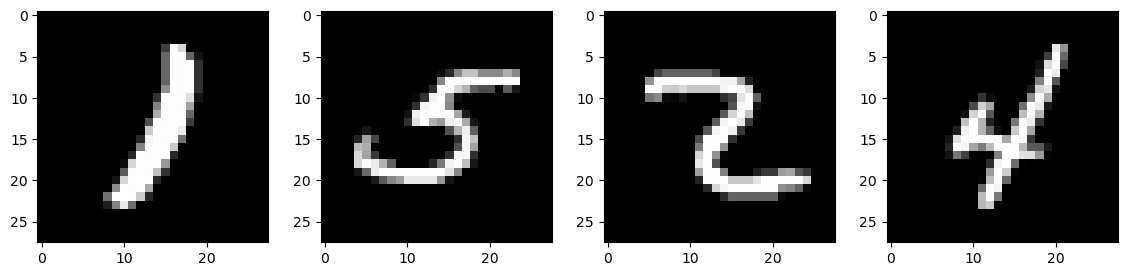

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.data import loadlocal_mnist

X_train, y_train = loadlocal_mnist(
        images_path='/Users/dokman0000/Downloads/train-images-idx3-ubyte', 
        labels_path='/Users/dokman0000/Downloads/train-labels-idx1-ubyte'
        )

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(14, 3))
for ax in axs:
    ax.imshow(X_train[np.random.randint(1000)].reshape(28, 28), cmap='gray')

In [59]:
# select only two digits for binary classification

classes = [1, 8]
d = 28**2
X = np.ndarray((0, d))
y = np.ndarray((0, 1))

for cl in classes:
    X = np.vstack((X, X_train[y_train == cl]))
    y = np.vstack((y, y_train[y_train == cl, np.newaxis]))

n = len(y)
shuffle_idx = np.random.permutation(n) - 1
X = X[shuffle_idx]
y = y[shuffle_idx].flatten()
y = 2*(y == classes[0]) - 1

n = 5000
X = X[:n]
y = y[:n]

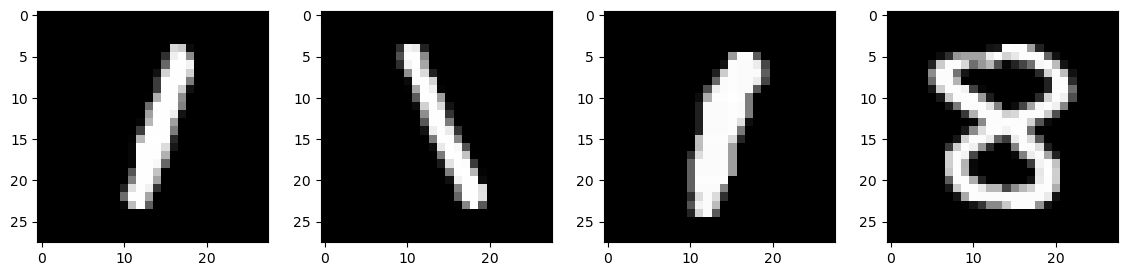

In [60]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(14, 3))
for ax in axs:
    ax.imshow(X[np.random.randint(1000)].reshape(28, 28), cmap='gray')

In [61]:
# write a function that implements this recipe
# nb: we'll write a nicer one later

def train(X, y, lr=1, n_iter=30):
    # X : a (n, d) matrix with rows being training examples (digits)
    # y : a (n, 1) vector of labels

    n, d = X.shape
    w = np.zeros((d,))
    
    for i_iter in range(n_iter):
        for i_example in range(n):
            y_est = np.sign(np.dot(X[i_example], w))

            if y_est != y[i_example]:
                w += lr * X[i_example] * y[i_example]
        
    return w

37 out of 5000 patterns are misclassified


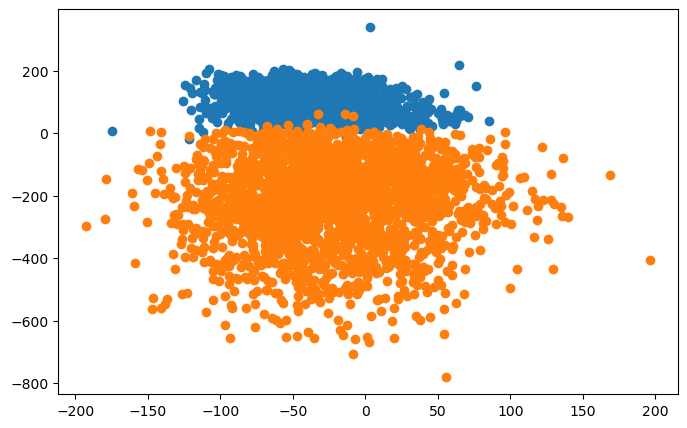

In [62]:
w = train(X, y)

error_count = np.sum(np.sign(X @ w) * y < 0 )
print("%d out of %d patterns are misclassified" % (error_count, n))
 
w_orth = np.random.randn(d) 
w_orth -= w * np.dot(w_orth, w) / np.linalg.norm(w)**2

X_w = X @ w / np.linalg.norm(w)
X_orth = X @ w_orth / np.linalg.norm(w_orth)

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X_orth[y==1], X_w[y==1])
_ = ax.scatter(X_orth[y==-1], X_w[y==-1])

# What do the weights do?

We can visualize the weights as a 28 $\times$ 28 image and see exactly how the different digits are distinguished. Very _interpretable_!

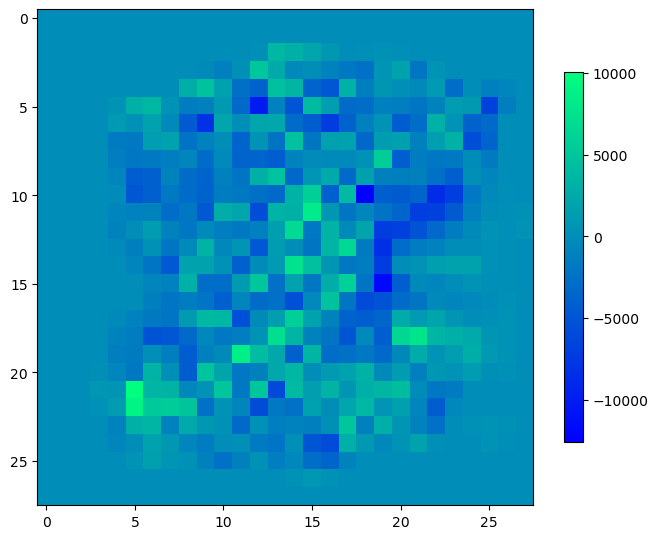

In [63]:
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(w.reshape(28, 28), cmap='winter')
_ = fig.colorbar(im, ax=ax, shrink=0.6)

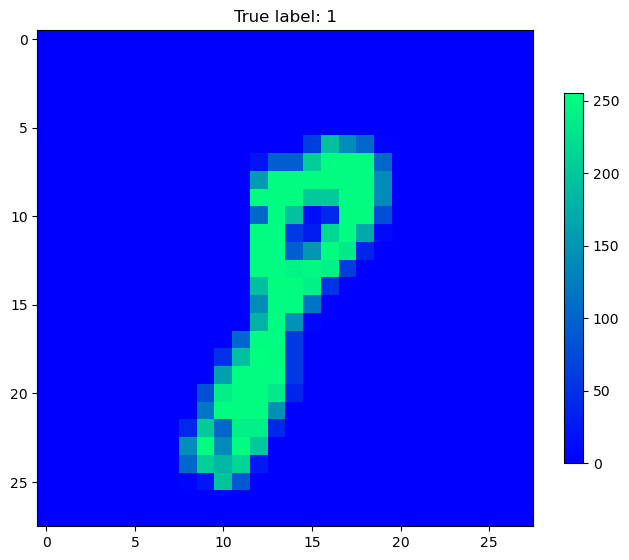

In [64]:
idx_err = np.where(np.sign(X @ w) * y < 0)
i = 15
x_err = X[idx_err[0][i]]

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(x_err.reshape(28, 28), cmap='winter')
_ = fig.colorbar(im, ax=ax, shrink=0.6)
ax.set_title("True label: %s" % (classes[(y[idx_err[0][i]] + 1) // 2]));


In [ ]:
idx_err[0]

In [ ]:
np.where?